# Кластеризация "Тестирование претендентов"

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')

%matplotlib inline



## Считывание

In [2]:
df = pd.read_csv('./data/assess.dat', sep='\t', index_col = 0)
print(df.shape)
df.head()

(18, 11)


,NAME,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NR,,,,,,,,,,,
1,Volker,10,10,9,10,10,10,9,10,10,9
2,Sigrid,10,10,4,10,5,5,4,5,4,3
3,Elmar,5,4,10,5,10,4,10,5,3,10
4,Peter,10,10,9,10,10,10,9,10,10,9
5,Otto,4,3,5,4,3,10,4,10,10,5


In [3]:
df = df.drop('NAME', axis=1)

Датасет, состоящий из результатов тестирования претендентов

In [4]:
df.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10'], dtype='object')

In [5]:
df.columns = ['Память на числа', 'Умение решать математические задачи', 'Находчивость при прямом диалоге', 
 'Умение составлять алгоритмы', 'Уверенность во время выступления',
'Командный дух', 'Находчивость', 'Сотрудничество', 
 'Признание в коллективе', 'Сила убеждения']

In [6]:
df.dtypes

Память на числа                        int64
Умение решать математические задачи    int64
Находчивость при прямом диалоге        int64
Умение составлять алгоритмы            int64
Уверенность во время выступления       int64
Командный дух                          int64
Находчивость                           int64
Сотрудничество                         int64
Признание в коллективе                 int64
Сила убеждения                         int64
dtype: object

In [7]:
df.describe()

,Память на числа,Умение решать математические задачи,Находчивость при прямом диалоге,Умение составлять алгоритмы,Уверенность во время выступления,Командный дух,Находчивость,Сотрудничество,Признание в коллективе,Сила убеждения
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,6.944444,7.000000,6.833333,6.777778,7.222222,7.111111,6.888889,7.000000,7.000000,7.222222
std,2.879384,2.807553,2.874840,3.001089,2.901431,2.784176,2.908181,3.029269,3.124853,2.712836
min,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000
25%,4.000000,5.000000,4.000000,4.000000,5.000000,4.250000,4.000000,4.000000,4.000000,5.000000
50%,6.000000,5.000000,7.000000,5.000000,7.500000,7.000000,7.000000,7.000000,7.500000,7.500000
75%,10.000000,10.000000,9.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Все показатели выражены в единой шкале. Поэтому нормализация не требуется

## Иерархическая кластеризация

In [8]:
# Объект, в котором будет хранится информация о последовательном слиянии кластеров
# Используем расстояние между объектами - евклидово
# Расстояние между кластерами - методом Уорда
link = linkage(df, 'ward', 'euclidean')

In [9]:
link[-50:, 2]

array([ 0.        ,  1.41421356,  1.41421356,  1.41421356,  1.41421356,
        2.        ,  2.23606798,  2.23606798,  2.23606798,  2.44948974,
        2.82842712,  2.93257566,  3.31662479,  4.79583152, 28.01785145,
       29.92940412, 33.23097103])

### Построение дендрограммы

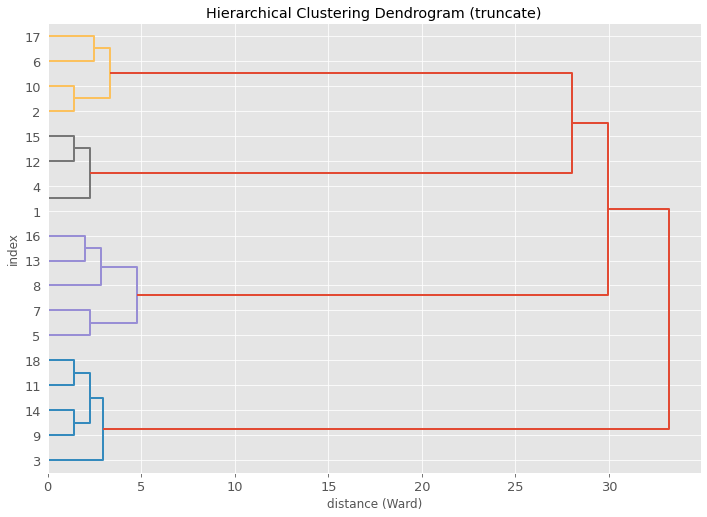

In [10]:
matplotlib.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

dn = dendrogram(link,
                labels=df.index.tolist(),
                truncate_mode='lastp',
                orientation = "right",
                )
ax.tick_params(labelsize=13)
plt.title('Hierarchical Clustering Dendrogram (truncate)')
plt.ylabel('index')
plt.xlabel('distance (Ward)')
plt.show()

### Построение каменистой осыпи

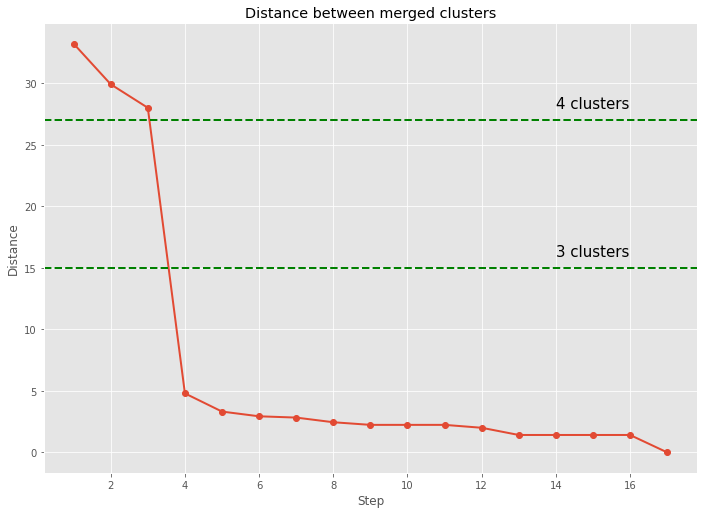

In [11]:
dist = link[-50:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(15, c='g', linestyle='dashed')
plt.axhline(27, c='g', linestyle='dashed')


plt.text(14, 16, '3 clusters', size = 15)
plt.text(14, 28, '4 clusters', size = 15)

plt.show()

### 3 кластера

In [12]:
df['cluster'] = fcluster(link, 3, criterion='maxclust')

In [13]:
df.groupby('cluster').mean()

,Память на числа,Умение решать математические задачи,Находчивость при прямом диалоге,Умение составлять алгоритмы,Уверенность во время выступления,Командный дух,Находчивость,Сотрудничество,Признание в коллективе,Сила убеждения
cluster,,,,,,,,,,
1,4.2,4.8,10.000,4.4,10.000,4.4,10.0,4.0,3.800,10.000
2,4.8,4.4,4.000,4.0,4.200,10.0,4.4,10.0,10.000,5.000
3,10.0,10.0,6.625,10.0,7.375,7.0,6.5,7.0,7.125,6.875


In [14]:
df.groupby('cluster').size()

cluster
1    5
2    5
3    8
dtype: int64

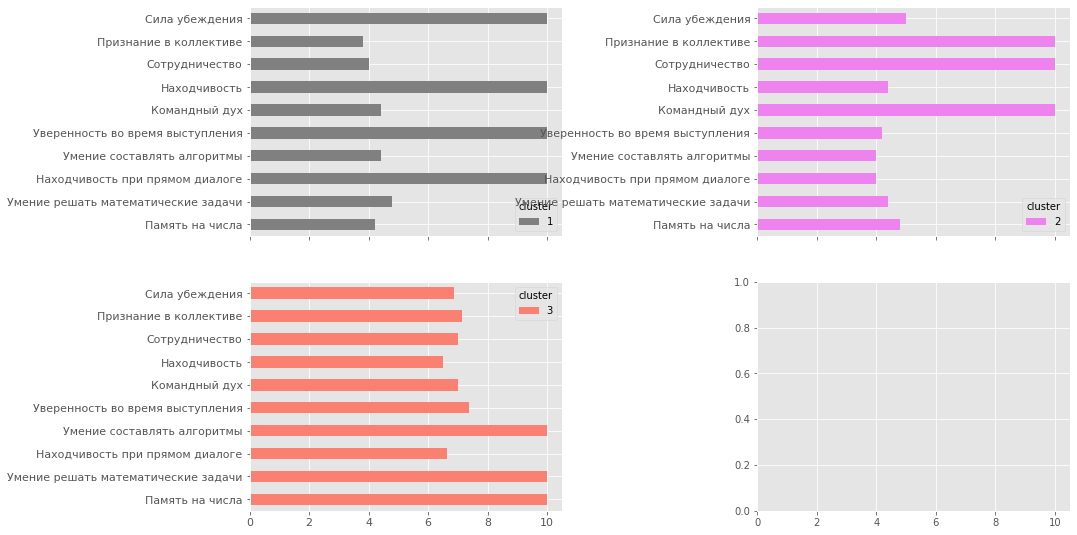

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(14.7, 9.27)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
try:
    for i in range(2):
        for j in range(2):
            ax = axs[i, j]
            k += 1
            df[df.cluster == k].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
            ax.tick_params(labelsize = 11)
except TypeError:
    pass

### 4 кластера

In [16]:
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [17]:
df.groupby('cluster').mean()

,Память на числа,Умение решать математические задачи,Находчивость при прямом диалоге,Умение составлять алгоритмы,Уверенность во время выступления,Командный дух,Находчивость,Сотрудничество,Признание в коллективе,Сила убеждения
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


In [18]:
df.groupby('cluster').size()

cluster
1    5
2    5
3    4
4    4
dtype: int64

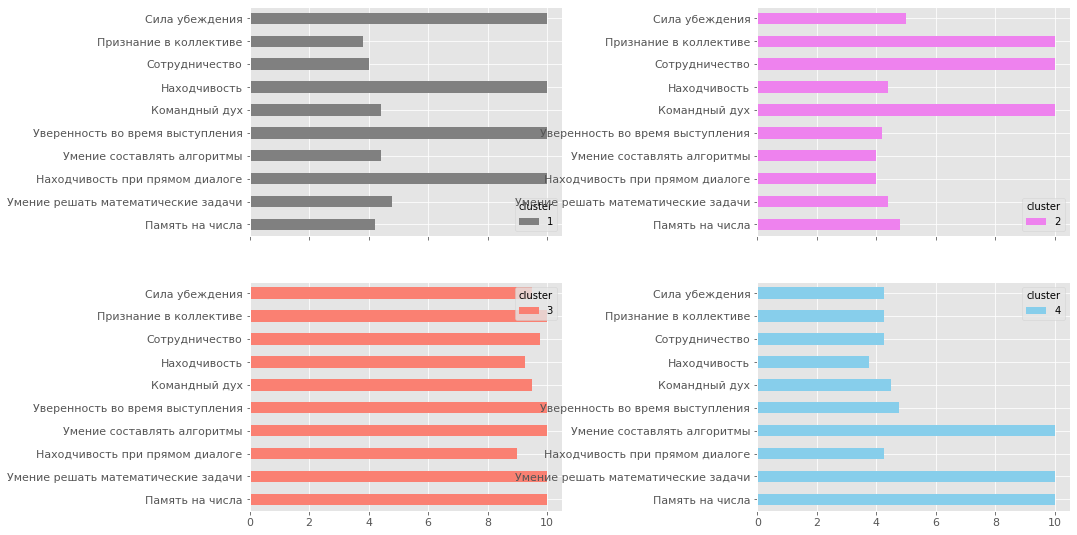

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(14.7, 9.27)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        k += 1
        df[df.cluster == k].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
        ax.tick_params(labelsize = 11)


- Кластер 1 - У прецедентов развиты ораторские качества

- Кластер 2 - Прецеденты обладают управленческими способностями

- Кластер 3 - Прецеденты обладают предпринимательскими способностями

- Кластер 4 - Прецеденты обладают аналитическим складом ума


## Кластеризация методом k-means

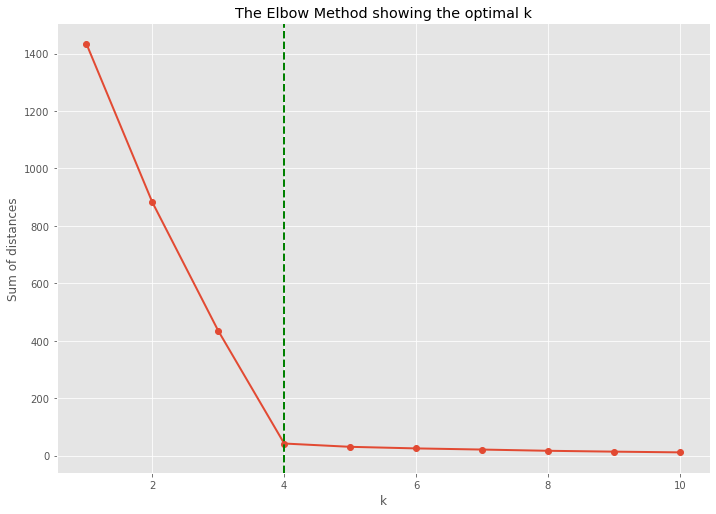

In [20]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df.iloc[:, :-1]) for k in K]
dist = [model.inertia_ for model in models]
#Метод inertia_ вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера. 
#кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров.



fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.axvline(4, c='g', linestyle='dashed')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Память на числа,Умение решать математические задачи,Находчивость при прямом диалоге,Умение составлять алгоритмы,Уверенность во время выступления,Командный дух,Находчивость,Сотрудничество,Признание в коллективе,Сила убеждения
cluster,,,,,,,,,,
0,4.2,4.8,10.000,4.4,10.000,4.4,10.0,4.0,3.800,10.000
1,4.8,4.4,4.000,4.0,4.200,10.0,4.4,10.0,10.000,5.000
2,10.0,10.0,6.625,10.0,7.375,7.0,6.5,7.0,7.125,6.875


In [22]:
df.groupby('cluster').size()

cluster
0    5
1    5
2    8
dtype: int64

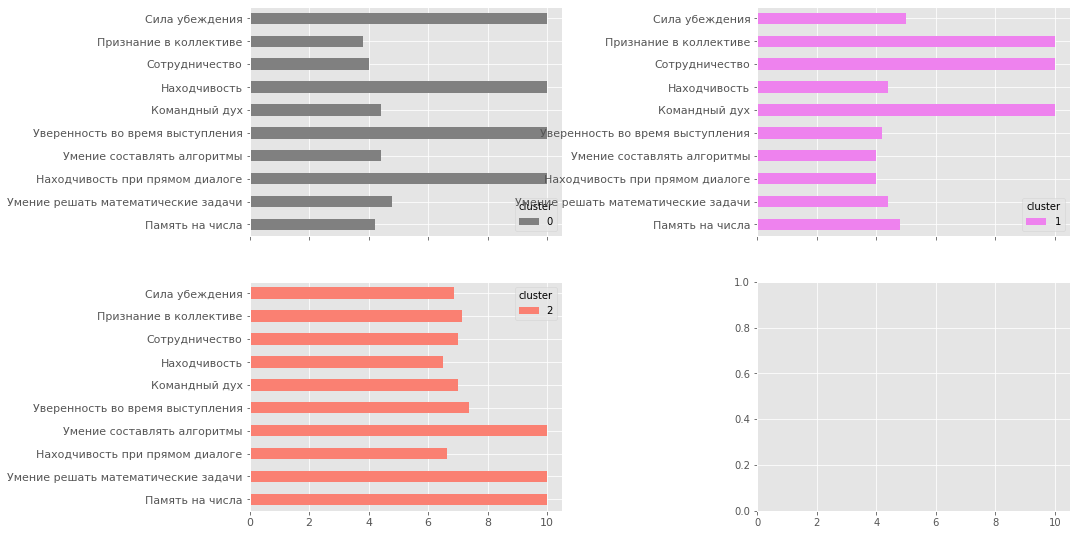

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(14.7, 9.27)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
try:
    for i in range(2):
        for j in range(2):
            ax = axs[i, j]
            k += 1
            df[df.cluster == k-1].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
            ax.tick_params(labelsize = 11)
except TypeError:
    pass

Два кластера отличаются от тех, что были получины при иерархической кластеризации.

Кластер 0 - У прецедентов развиты ораторские качества  
Кластер 1 - У прецедентов развиты ораторские качества  
Кластер 2 - Прецеденты обладают аналитическим складом ума

In [24]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Память на числа,Умение решать математические задачи,Находчивость при прямом диалоге,Умение составлять алгоритмы,Уверенность во время выступления,Командный дух,Находчивость,Сотрудничество,Признание в коллективе,Сила убеждения
cluster,,,,,,,,,,
0,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50


In [25]:
df.groupby('cluster').size()

cluster
0    5
1    5
2    4
3    4
dtype: int64

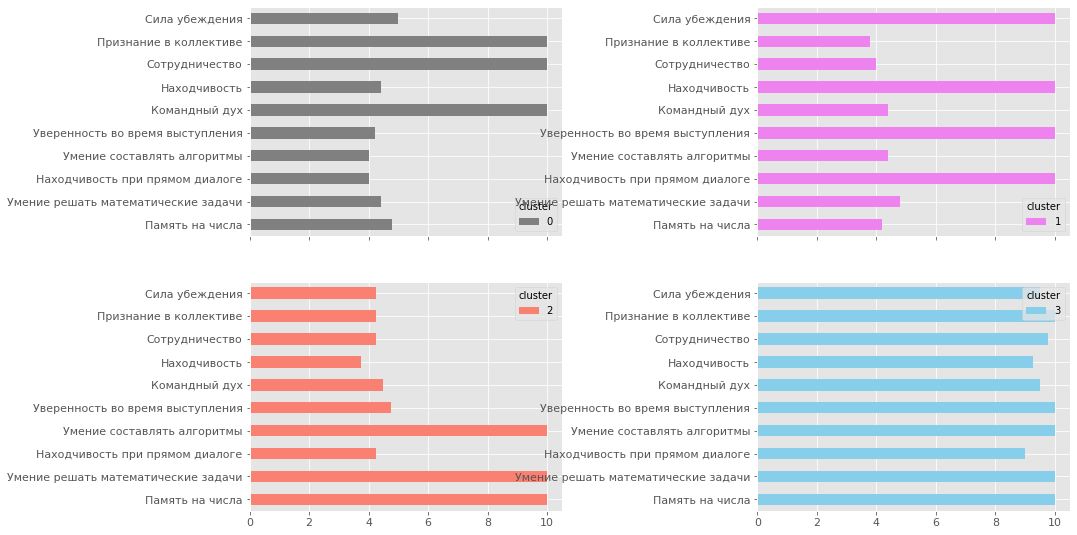

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(14.7, 9.27)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        k += 1
        df[df.cluster == k-1].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
        ax.tick_params(labelsize = 11)



- Кластер 0 - Прецеденты обладают управленческими способностями

- Кластер 1 - У прецедентов развиты ораторские качества

- Кластер 2 - Прецеденты обладают аналитическим складом ума

- Кластер 3 - Прецеденты обладают предпринимательскими способностями




Результаты получились похожие